# Statistiche e grafici delle risoluzioni dei cubi di Rubik

In [11]:
from pandas import read_csv
import matplotlib.pyplot as plt
import modulo_rubik

df = read_csv("../database.csv", sep="\t", parse_dates=["Data"])
# Inserimento colonna "Tempo" con i secondi convertiti in minuti e secondi
df.insert(loc=2, column="Tempo", value=df["Secondi"].apply(modulo_rubik.conversione_secondi))

In [12]:
# Ultime 10 risoluzioni
df.tail(10)

,Data,Secondi,Tempo,Cubo
198,2025-11-14,269.69,"(4, 29.69)",4x4
199,2025-11-14,225.73,"(3, 45.73)",4x4
200,2026-01-10,384.44,"(6, 24.44)",Mirror
201,2026-01-10,48.48,"(0, 48.48)",2x2
202,2026-01-10,101.49,"(1, 41.49)",2x2
203,2026-01-10,21.43,"(0, 21.43)",2x2
204,2026-01-10,65.97,"(1, 5.97)",3x3
205,2026-01-10,40.44,"(0, 40.44)",3x3
206,2026-01-10,53.02,"(0, 53.02)",3x3
207,2026-01-10,242.95,"(4, 2.95)",4x4


# Record personali per tipo di cubo 🥇🥈🥉

In [13]:
df.groupby(by="Cubo").min().sort_values(by="Secondi").drop(columns=["Data", "Secondi"])

,Tempo
Cubo,
2x2,"(0, 15.12)"
3x3,"(0, 40.44)"
4x4,"(3, 30.86)"
Mirror,"(3, 58.89)"
5x5,"(7, 59.65)"
Megaminx,"(30, 10.61)"


Text(0.5, 0, 'Cubi')

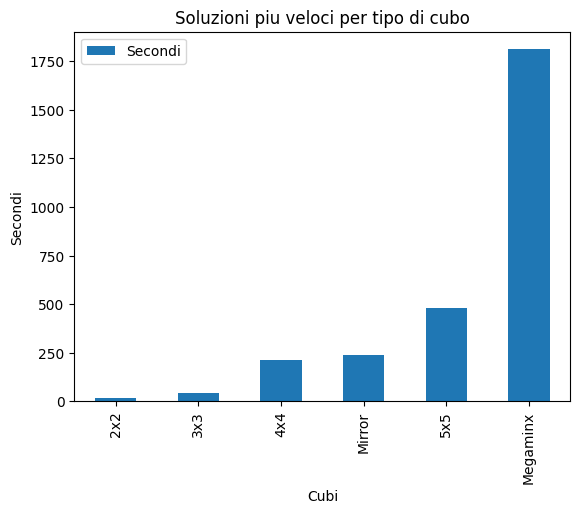

In [14]:
# Creazione grafico
df.drop(columns=["Data", "Tempo"]).groupby(by="Cubo").min().sort_values(by="Secondi").plot.bar()
plt.title("Soluzioni piu veloci per tipo di cubo")
plt.ylabel("Secondi")
plt.xlabel("Cubi")

In [15]:
# Medie dei tempi di risoluzione in secondi
medie_df = df.groupby(by="Cubo")["Secondi"].mean().round(2)
medie_df

Cubo
2x2           60.92
3x3           71.97
4x4          266.74
5x5          727.32
Megaminx    2155.38
Mirror       520.58
Name: Secondi, dtype: float64

In [16]:
# Medie dei tempi di risoluzione in minuti e secondi
print("Cubo     Minuti e secondi")
for i, s in medie_df.items():
    print(i, "\t", modulo_rubik.conversione_secondi(s))

Cubo     Minuti e secondi
2x2 	 (1, 0.92)
3x3 	 (1, 11.97)
4x4 	 (4, 26.74)
5x5 	 (12, 7.32)
Megaminx 	 (35, 55.38)
Mirror 	 (8, 40.58)


Text(0.5, 0, 'Cubi')

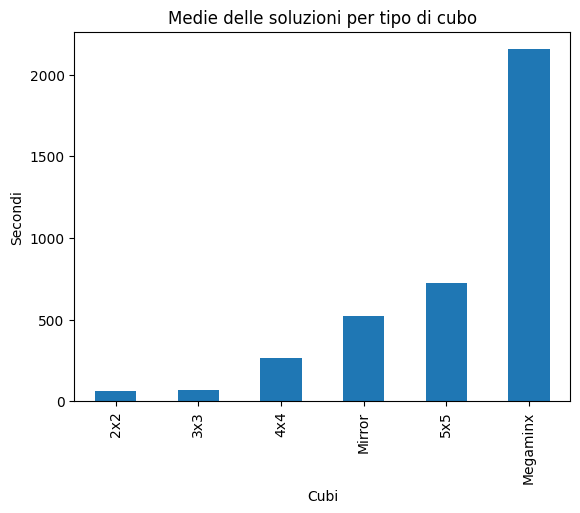

In [17]:
# Creazione grafico
df.groupby(by="Cubo")["Secondi"].mean().sort_values().plot.bar()
plt.title("Medie delle soluzioni per tipo di cubo")
plt.ylabel("Secondi")
plt.xlabel("Cubi")

In [18]:
# Numero di risoluzioni dei diversi cubi
df["Cubo"].value_counts()

Cubo
3x3         71
2x2         53
4x4         48
5x5         24
Mirror       9
Megaminx     3
Name: count, dtype: int64

Text(0.5, 0, 'Cubi')

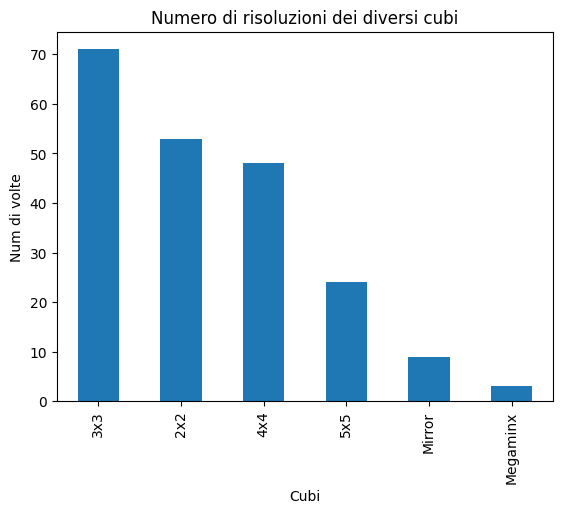

In [19]:
# Creazione grafico
df["Cubo"].value_counts().plot.bar()
plt.title("Numero di risoluzioni dei diversi cubi")
plt.ylabel("Num di volte")
plt.xlabel("Cubi")

In [20]:
# Detaframe delle soluzioni del cubo 2x2
df_2x2 = df[df["Cubo"] == "2x2"].sort_values(by="Secondi")
# df_2x2

In [21]:
# Detaframe delle soluzioni del cubo 3x3
df_3x3 = df[df["Cubo"] == "3x3"].sort_values(by="Secondi")
# df_3x3

In [22]:
# Detaframe delle soluzioni del cubo 4x4
df_4x4 = df[df["Cubo"] == "4x4"].sort_values(by="Secondi")
# df_4x4

In [23]:
# Detaframe delle soluzioni del cubo 5x5
df_5x5 = df[df["Cubo"] == "5x5"].sort_values(by="Secondi")
# df_5x5

In [24]:
df[df["Data"].dt.month == 4] # soluzioni Aprile

,Data,Secondi,Tempo,Cubo
88,2025-04-19,2632.0,"(43, 52.0)",Megaminx
89,2025-04-19,934.0,"(15, 34.0)",5x5


In [25]:
# Numero di volte in cui ho risolto il cubo nel 2025 ogni mese
df_2025 = df[df["Data"].dt.year == 2025]
df_2025["Data"].dt.month.value_counts().sort_index()

Data
1     41
2     35
3     12
4      2
5     24
7     14
8     29
9     12
10     6
11    25
Name: count, dtype: int64

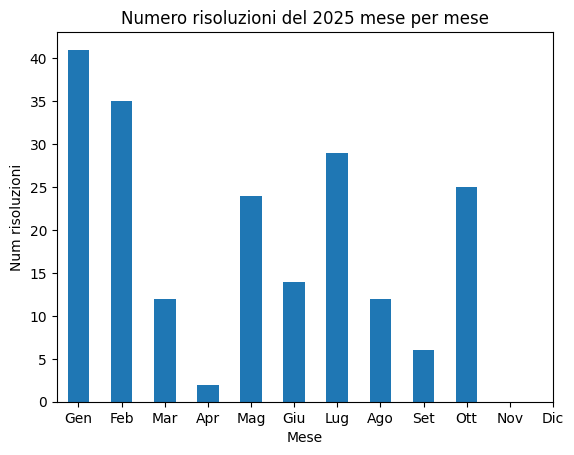

In [33]:
# Grafico del numero di risoluzioni del 2025 mese per mese
df_2025["Data"].dt.month.value_counts().sort_index().plot(kind="bar")
plt.title("Numero risoluzioni del 2025 mese per mese")
plt.ylabel("Num risoluzioni")
plt.xlabel("Mese")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11],
           labels=["Gen", "Feb", "Mar", "Apr", "Mag", "Giu", "Lug", "Ago", "Set", "Ott", "Nov", "Dic"],
           rotation=0)
plt.show()

In [27]:
df[df["Data"].dt.year == 2025]

,Data,Secondi,Tempo,Cubo
0,2025-01-11,111.29,"(1, 51.29)",3x3
1,2025-01-11,78.77,"(1, 18.77)",3x3
2,2025-01-11,272.29,"(4, 32.29)",2x2
3,2025-01-11,95.09,"(1, 35.09)",3x3
4,2025-01-11,113.01,"(1, 53.01)",3x3
...,...,...,...,...
195,2025-11-14,67.76,"(1, 7.76)",3x3
196,2025-11-14,53.72,"(0, 53.72)",3x3
197,2025-11-14,50.31,"(0, 50.31)",3x3
198,2025-11-14,269.69,"(4, 29.69)",4x4


In [ ]:
df = df.assign(Anno=df["Data"].dt.year)
df = df.assign(Mese=df["Data"].dt.month)
df = df.assign(Giorno=df["Data"].dt.day)
df = df[["Data", "Anno", "Mese", "Giorno", "Secondi", "Tempo", "Cubo"]] # Riordinamento colonne
df.tail(5)

,Data,Anno,Mese,Giorno,Secondi,Tempo,Cubo
203,2026-01-10,2026,1,10,21.43,"(0, 21.43)",2x2
204,2026-01-10,2026,1,10,65.97,"(1, 5.97)",3x3
205,2026-01-10,2026,1,10,40.44,"(0, 40.44)",3x3
206,2026-01-10,2026,1,10,53.02,"(0, 53.02)",3x3
207,2026-01-10,2026,1,10,242.95,"(4, 2.95)",4x4


In [40]:
df["Mese"] = df["Mese"].replace({1:"Gennaio",
                                 2:"Febbraio",
                                 3:"Marzo",
                                 4:"Aprile",
                                 5:"Maggio",
                                 6:"Giugno",
                                 7:"Luglio",
                                 8:"Agosto",
                                 9:"Settembre",
                                 10:"Ottobre",
                                 11:"Novembre",
                                 12:"Dicembre"
                                 })
df.tail(5)

,Data,Anno,Mese,Giorno,Secondi,Tempo,Cubo
203,2026-01-10,2026,Gennaio,10,21.43,"(0, 21.43)",2x2
204,2026-01-10,2026,Gennaio,10,65.97,"(1, 5.97)",3x3
205,2026-01-10,2026,Gennaio,10,40.44,"(0, 40.44)",3x3
206,2026-01-10,2026,Gennaio,10,53.02,"(0, 53.02)",3x3
207,2026-01-10,2026,Gennaio,10,242.95,"(4, 2.95)",4x4


In [41]:
df = df.rename(columns={"Data":"Data completa"})
df.tail(5)

,Data completa,Anno,Mese,Giorno,Secondi,Tempo,Cubo
203,2026-01-10,2026,Gennaio,10,21.43,"(0, 21.43)",2x2
204,2026-01-10,2026,Gennaio,10,65.97,"(1, 5.97)",3x3
205,2026-01-10,2026,Gennaio,10,40.44,"(0, 40.44)",3x3
206,2026-01-10,2026,Gennaio,10,53.02,"(0, 53.02)",3x3
207,2026-01-10,2026,Gennaio,10,242.95,"(4, 2.95)",4x4
